**Клевицкий Дмитрий 20.09.24**

1) На семинаре узнали алгоритм Прима и Краскала для нахождения остовного дерева
2) Тема индивидуального проекта закреплена за мной, буду начинать работу над проектом


In [18]:
import networkx as nx
from random import randint

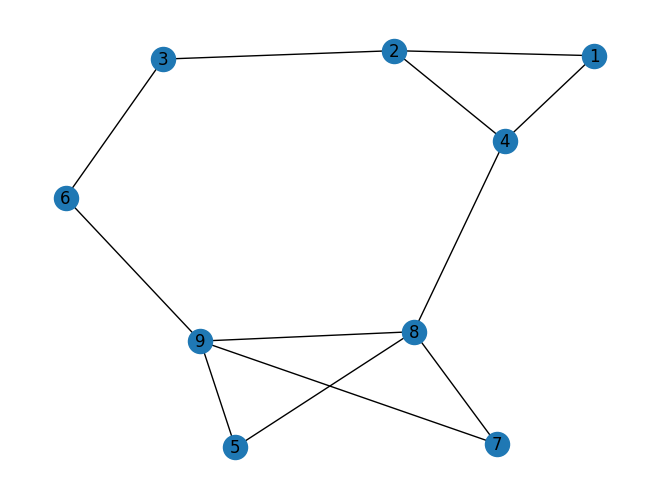

In [38]:
G = nx.Graph()
edges = [
    (1, 2, 1), (2, 3, 5), (3, 6, 10), (3, 6, 4), (6, 9, 4), (2, 1, 3),
    (9, 7, 1), (9, 8, 4), (7, 8, 5), (8, 4, 4), (1, 4, 4), (1, 4, 9),
    (4, 2, 12), (4, 2, 8), (5, 8, 1), (5, 8, 3), (5, 9, 5)
]
G.add_weighted_edges_from(edges)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

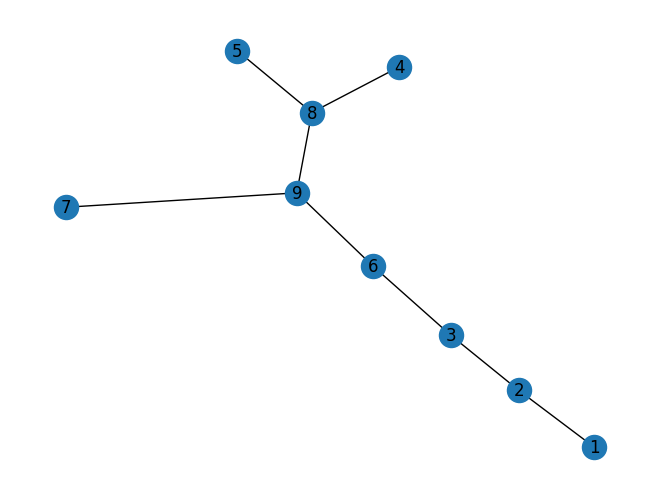

In [40]:
def prim_mst(graph):
    start_vertex = list(graph.nodes())[0]
    mst_edges = []  # Ребра остовного дерева
    visited = set([start_vertex])  # Посещенные вершины

    # Накапливаем все доступные ребра
    edges = [
        (start_vertex, neighbor, graph[start_vertex][neighbor]['weight'])
        for neighbor in graph.neighbors(start_vertex)
    ]

    # Пока есть непосещенные вершины
    while len(visited) < graph.number_of_nodes():
        # Найдем ребро с минимальным весом
        min_edge = min(edges, key=lambda x: x[2])
        edges.remove(min_edge)

        # Если одна из вершин еще не посещена, добавляем ее в дерево
        vertex = min_edge[1] if min_edge[0] in visited else min_edge[0]
        
        if vertex not in visited:
            visited.add(vertex)
            mst_edges.append(min_edge)
            
            # Добавляем новые доступные ребра из добавленной вершины
            for neighbor in graph.neighbors(vertex):
                if neighbor not in visited:
                    edges.append((vertex, neighbor, graph[vertex][neighbor]['weight']))

    return mst_edges


mst_result = prim_mst(G)

G_ost = nx.Graph()
G_ost.add_weighted_edges_from(mst_result)
nx.draw(G_ost, with_labels=True)

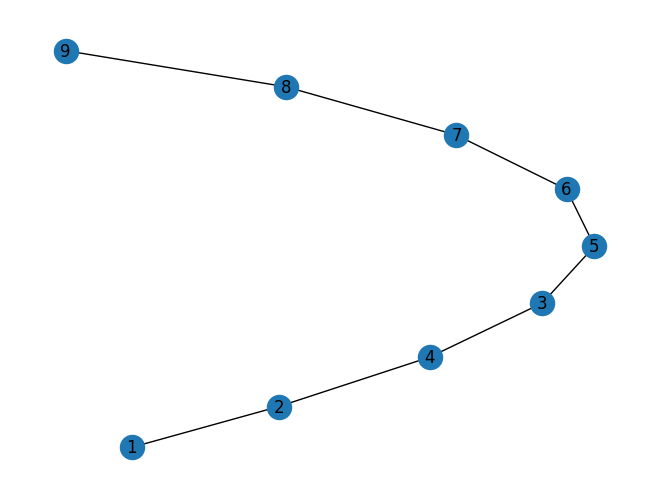

In [51]:
mst_nx = nx.minimum_spanning_tree(G2, algorithm="prim")
G_nx = nx.path_graph(mst_nx)
nx.draw(G_nx, with_labels=True)

In [53]:
list(mst_nx)

[1, 2, 4, 3, 5, 6, 7, 8, 9]